In [1]:
import pandas as pd

In [103]:
data = pd.read_excel("ABB_Data.xlsx", sheet_name="Data")

In [3]:
data.head()

,Country,Date,Order Value (USD)
0,Canada,2019-01,2.215572e+06
1,Canada,2019-02,2.090147e+06
2,Canada,2019-03,6.633213e+06
3,Canada,2019-04,2.067832e+06
4,Canada,2019-05,2.317593e+06


In [4]:
data["Country"].value_counts()

Canada     40
China      40
Germany    40
Italy      40
USA        40
Name: Country, dtype: int64

In [5]:
data_germany = data[data["Country"]=="Germany"]

In [6]:
data_italy = data[data["Country"]=="Italy"]

In [7]:
data_usa = data[data["Country"]=="USA"]

In [8]:
data_canada = data[data["Country"]=="Canada"]

In [9]:
data_china = data[data["Country"]=="China"]

In [10]:
data[data["Date"]=="2019-01"]

,Country,Date,Order Value (USD)
0,Canada,2019-01,2.215572e+06
40,China,2019-01,6.788150e+06
80,Germany,2019-01,3.736231e+07
120,Italy,2019-01,3.405980e+06
160,USA,2019-01,2.716433e+07


In [11]:
from datetime import datetime

In [12]:
def convert_date(data):
  data["Date"] = data["Date"].apply(lambda x: datetime.strptime(x,'%Y-%m'))

In [13]:
convert_date(data_germany)
convert_date(data_china)
convert_date(data_usa)
convert_date(data_italy)
convert_date(data_canada)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data_germany =  data_germany.drop("Country" , axis=1)
data_china = data_china.drop("Country" , axis=1)
data_usa = data_usa.drop("Country" , axis=1)
data_italy =  data_italy.drop("Country" , axis=1)
data_canada =  data_canada.drop("Country" , axis=1)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def plot_data(data):
  data.set_index('Date', inplace = True)
  data.plot()

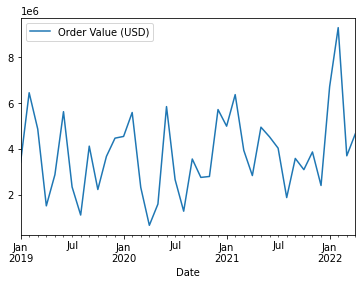

In [17]:
plot_data(data_italy)

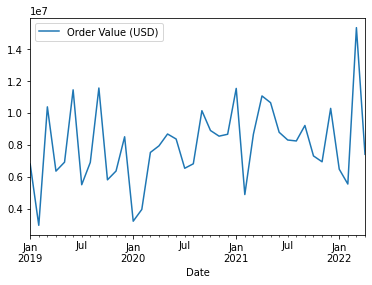

In [18]:
plot_data(data_china)

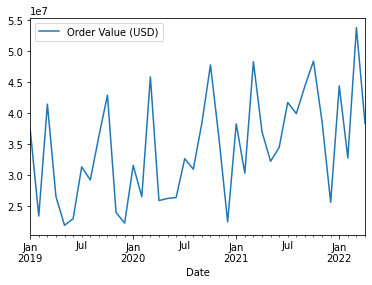

In [19]:
plot_data(data_germany)

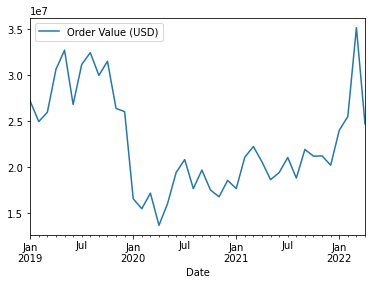

In [20]:
plot_data(data_usa)

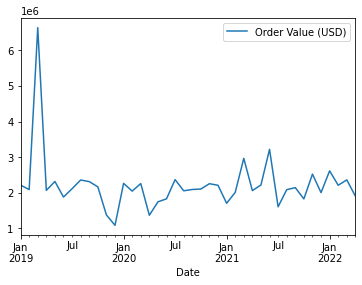

In [21]:
plot_data(data_canada)

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose\

def plot_kch(data):
  plt.rcParams.update({'figure.figsize' : (20,10)})
  decompose = seasonal_decompose(data, period = 12)
  decompose.plot()
  plt.show()

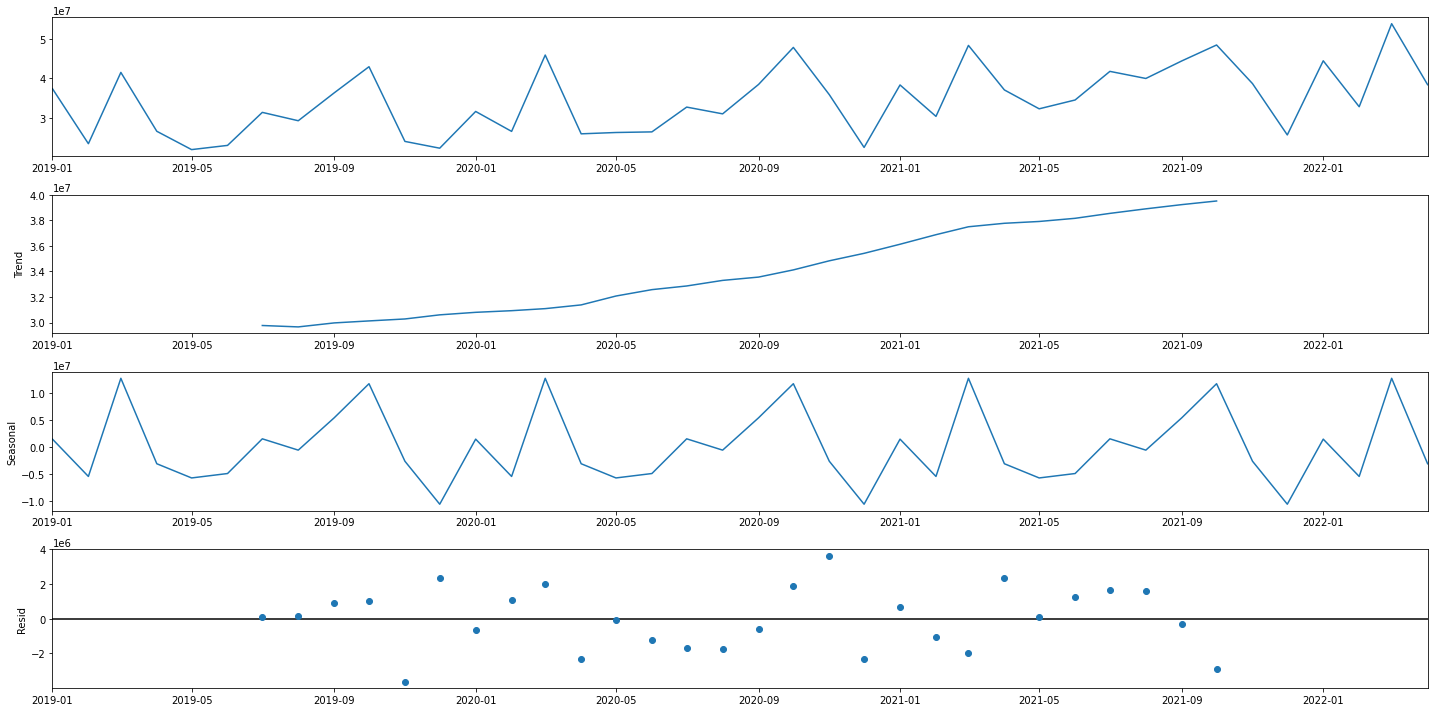

In [23]:
plot_kch(data_germany)

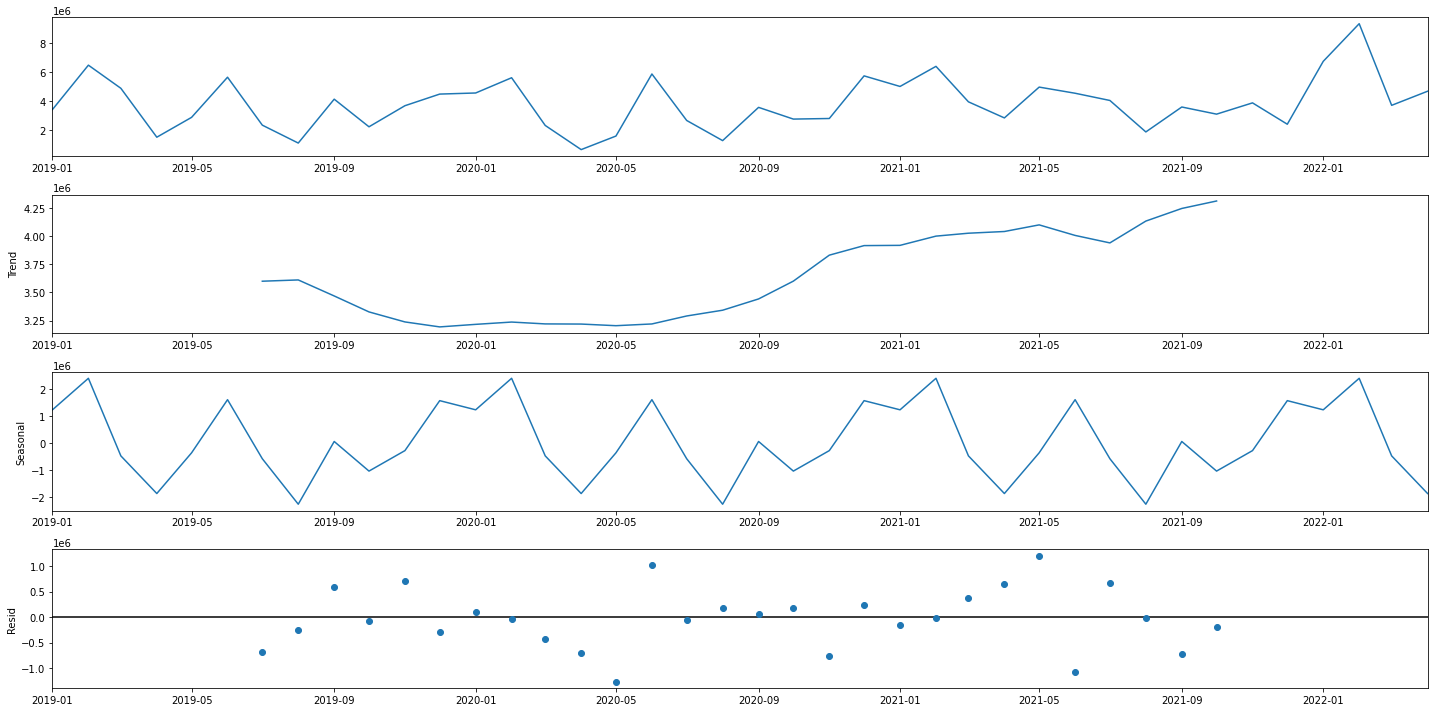

In [24]:
plot_kch(data_italy)

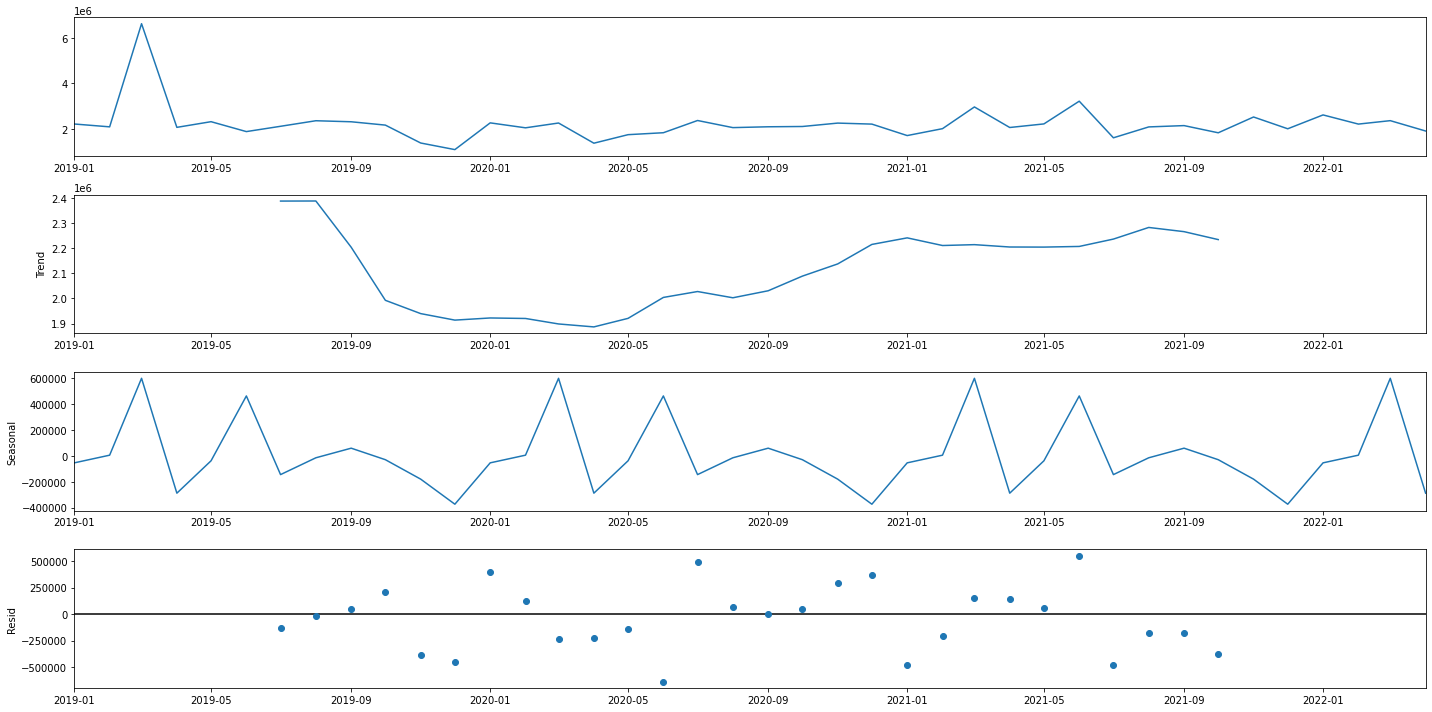

In [25]:
plot_kch(data_canada)

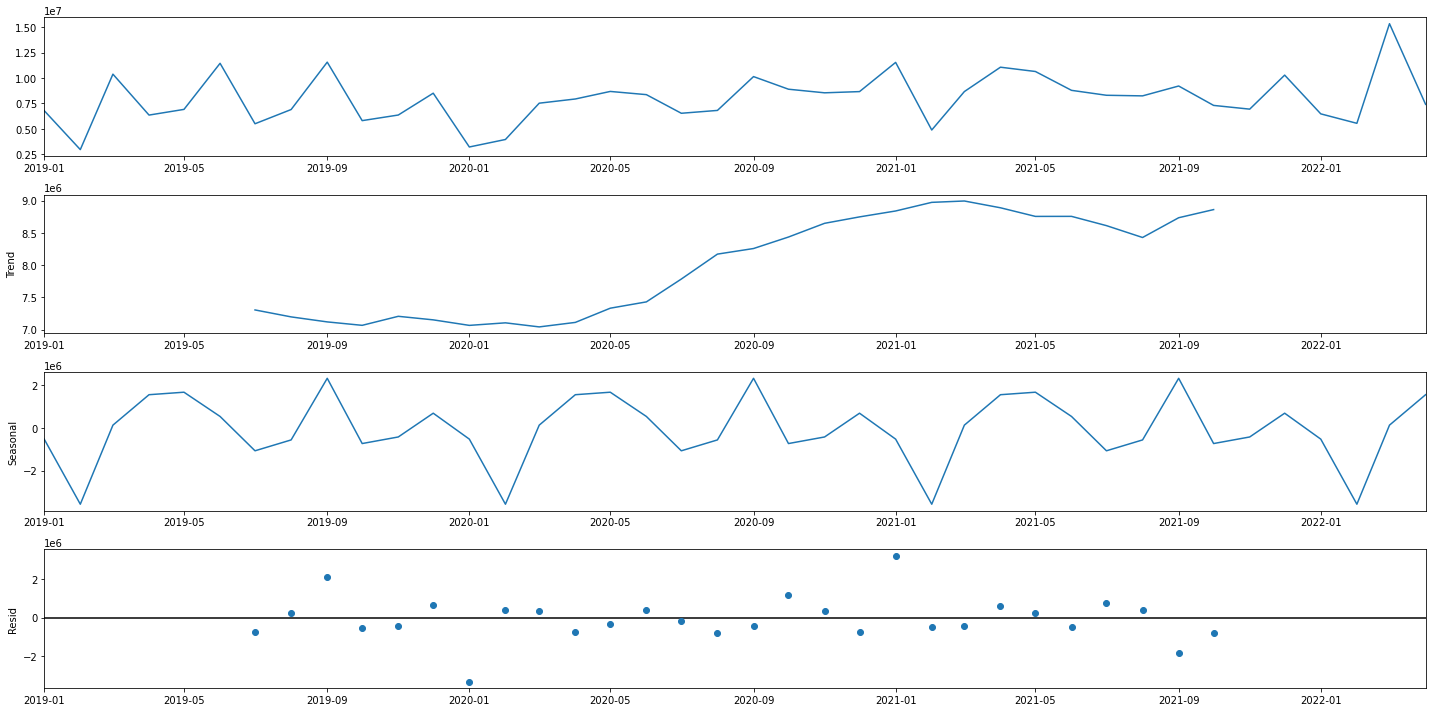

In [26]:
plot_kch(data_china)

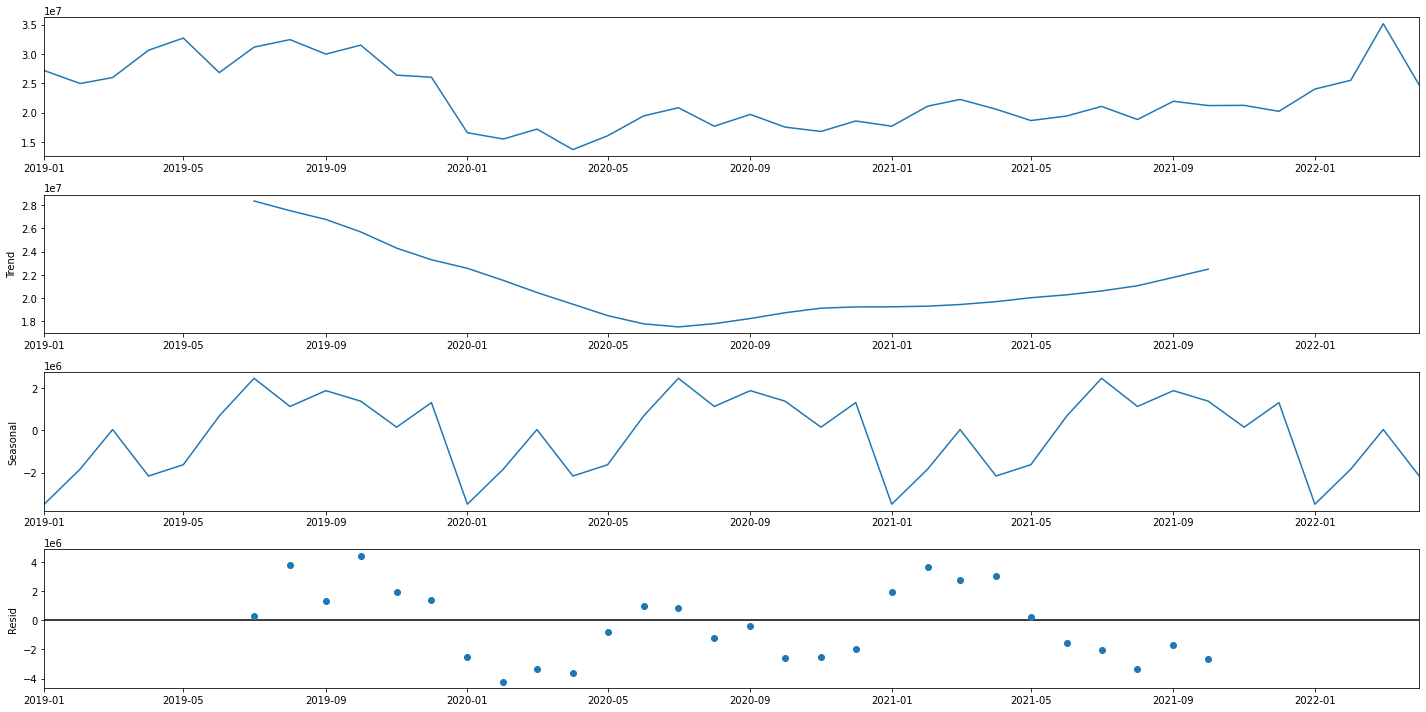

In [27]:
plot_kch(data_usa)

In [28]:
!pip install kats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 5.2 MB/s 
     |████████████████████████████████| 67.3 MB 123 kB/s 
     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 361 kB 53.0 MB/s 
     |████████████████████████████████| 950 kB 48.8 MB/s 
     |████████████████████████████████| 347 kB 60.6 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
    Running setup.py install for fbprophet ... done
  DEPRECATION: fbprophet was installed using the legacy 'setup.py install' met

In [29]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [30]:
data_germany = data[data["Country"]=="Germany"]

In [31]:
data_germany =  data_germany.drop("Country" , axis=1)

In [32]:
data  = data_germany.copy()

In [33]:
data.columns = ["time", "value"]
data.head()

,time,value
80,2019-01,3.736231e+07
81,2019-02,2.344875e+07
82,2019-03,4.147935e+07
83,2019-04,2.659146e+07
84,2019-05,2.195733e+07


In [34]:
data = TimeSeriesData(data)

In [35]:
data_from_series = TimeSeriesData(time=data.time, value=data.value)

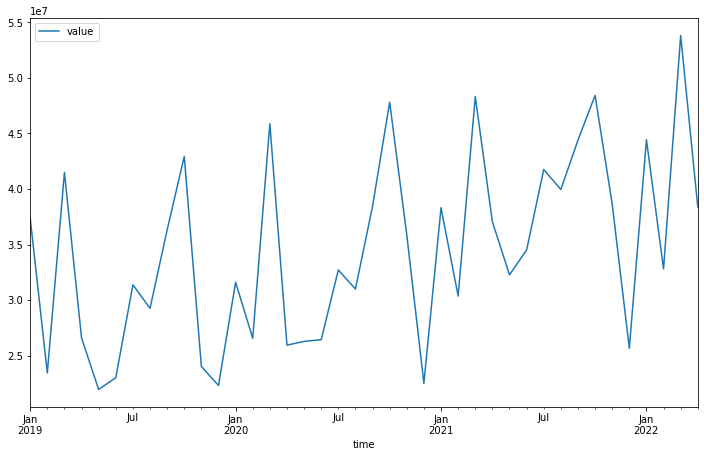

In [36]:
data_from_series.plot(cols=['value'])
plt.show()

In [37]:
data_from_series.is_empty()

False

In [38]:
data_from_series.is_univariate()

True

In [39]:
from kats.models.prophet import ProphetModel, ProphetParams


params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

m = ProphetModel(data_from_series, params)

m.fit()

fcst = m.predict(steps=15, freq="MS")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
fcst.head(5)

,time,fcst,fcst_lower,fcst_upper
0,2022-05-01,3.266146e+07,3.024288e+07,3.506961e+07
1,2022-06-01,3.431656e+07,3.196192e+07,3.663442e+07
2,2022-07-01,4.433020e+07,4.185173e+07,4.665755e+07
3,2022-08-01,4.187106e+07,3.928947e+07,4.420175e+07
4,2022-09-01,4.998128e+07,4.758012e+07,5.235300e+07


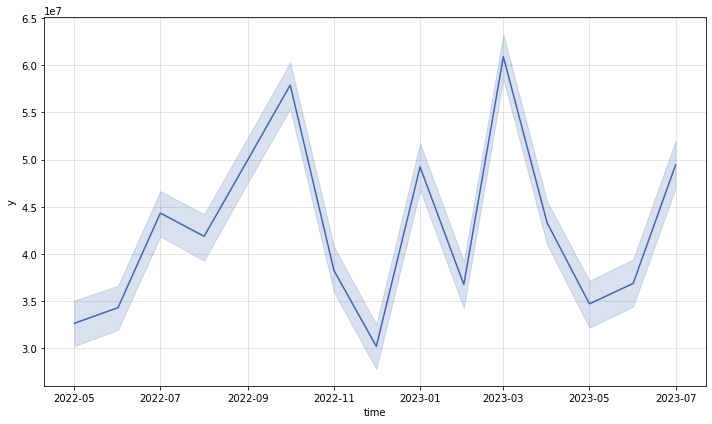

In [41]:
m.plot()

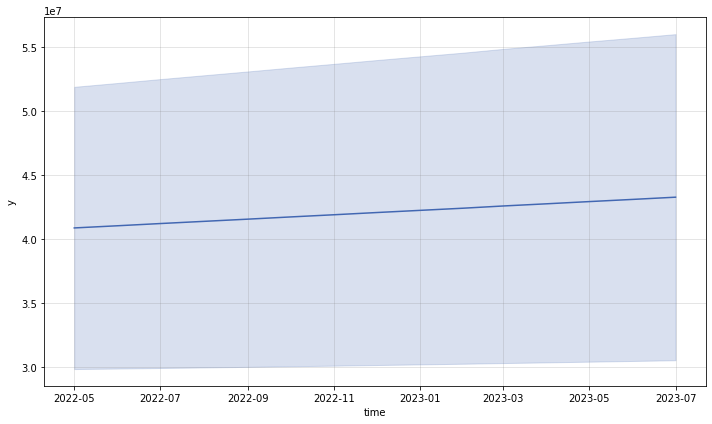

In [42]:
from kats.models.theta import ThetaModel, ThetaParams


params = ThetaParams()


m = ThetaModel(data=data_from_series, params=params)


m.fit()


res = m.predict(steps=15, alpha=0.2)

m.plot()

In [43]:
from kats.detectors.outlier import OutlierDetector

ts_outlierDetection = OutlierDetector(data_from_series, 'multiplicative') # call OutlierDetector
ts_outlierDetection.detector()

In [44]:
ts_outlierDetection.outliers=list(ts_outlierDetection.outliers[0])

In [45]:
from kats.consts import TimeSeriesData, TimeSeriesIterator
from kats.detectors.cusum_detection import CUSUMDetector

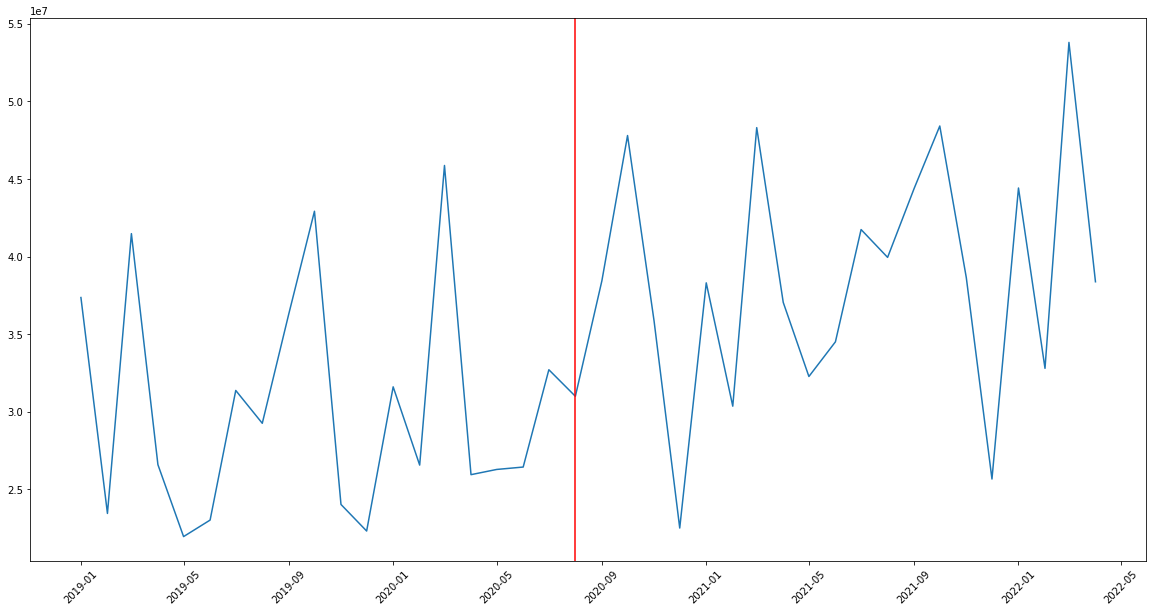

In [46]:
detector = CUSUMDetector(data_from_series)

# run detector
change_points = detector.detector(change_directions=["increase"])

# plot the results
detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

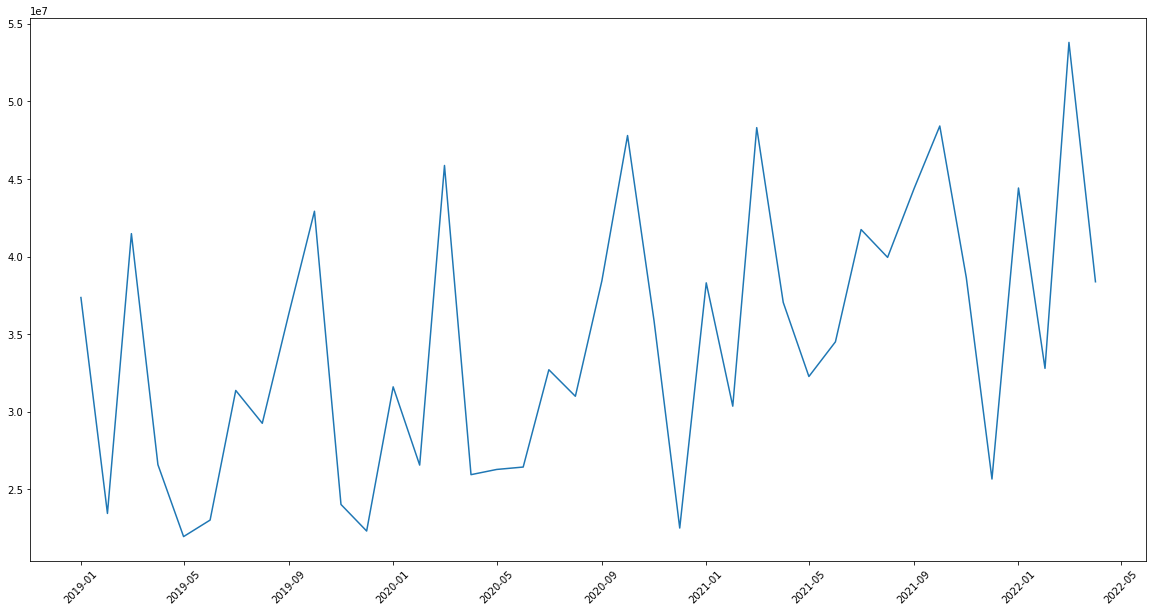

In [47]:
detector = CUSUMDetector(data_from_series)

# run detector
change_points = detector.detector(change_directions=["decrease"])

# plot the results
detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

In [48]:
from kats.tsfeatures.tsfeatures import TsFeatures
tsFeatures = TsFeatures()

In [49]:
features_data = TsFeatures().transform(data_from_series)

In [50]:
features_data

{'length': 40,
 'mean': 34502558.01125,
 'var': 71290220282082.56,
 'entropy': 0.8162648820026741,
 'lumpiness': 9.663057348304255e+25,
 'stability': 15083047435299.04,
 'flat_spots': 1,
 'hurst': -0.028026616204146988,
 'std1st_der': 6203429.062403368,
 'crossing_points': 18,
 'binarize_mean': 0.5,
 'unitroot_kpss': 0.04236881352272007,
 'heterogeneity': 12.571822926023223,
 'histogram_mode': 21957327.902999997,
 'linearity': 0.22024525792902758,
 'trend_strength': 0.5009596340846729,
 'seasonality_strength': 0.6476079665255194,
 'spikiness': 3.507421357591087e+23,
 'peak': 2,
 'trough': 4,
 'level_shift_idx': 1,
 'level_shift_size': 1217624.3114,
 'y_acf1': 0.1211406387949472,
 'y_acf5': 0.08435891255908912,
 'diff1y_acf1': -0.5109669597703252,
 'diff1y_acf5': 0.29225898617267504,
 'diff2y_acf1': -0.6550731750867055,
 'diff2y_acf5': 0.48625223890200564,
 'y_pacf5': 0.10853827465851634,
 'diff1y_pacf5': 0.8486493942318902,
 'diff2y_pacf5': 0.9134690027396626,
 'seas_acf1': 0.228615737

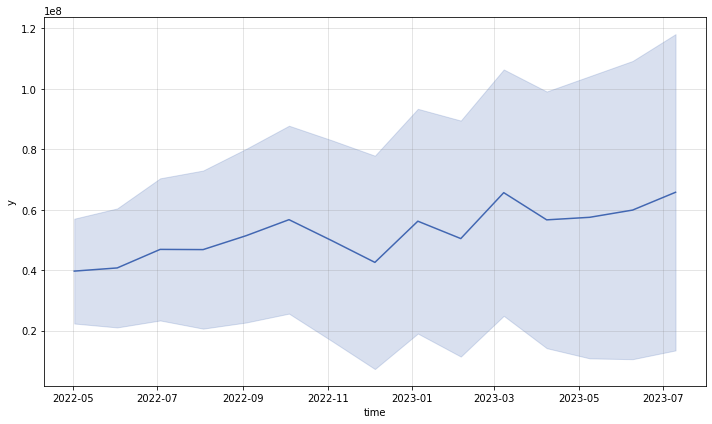

In [51]:
from kats.models.sarima import SARIMAModel, SARIMAParams
warnings.simplefilter(action='ignore')

# create SARIMA param class
params = SARIMAParams(
    p = 2, 
    d=1, 
    q=1, 
    trend = 'ct', 
    seasonal_order=(1,0,1,12)
    )

# initiate SARIMA model
m = SARIMAModel(data=data_from_series, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(
    steps=15, 
    )

# make plot to visualize
m.plot()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


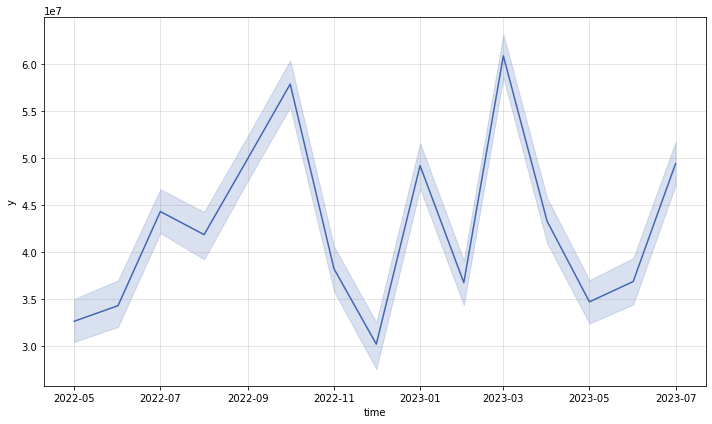

In [52]:
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(data_from_series, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=15, freq="MS")

# plot to visualize
m.plot()

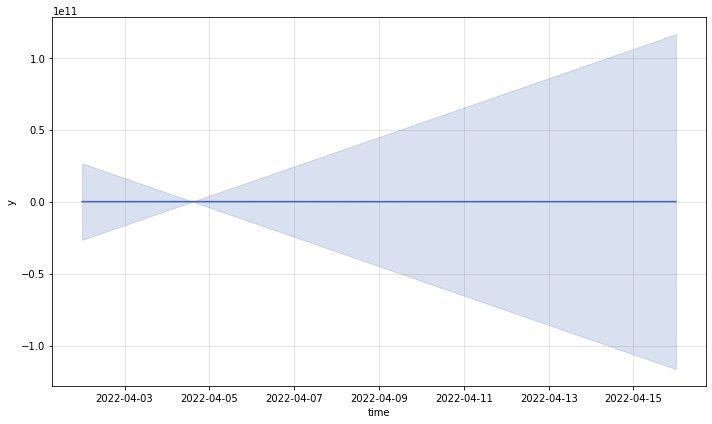

In [53]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=data_from_series, 
    params=params)

m.fit()
fcst = m.predict(steps=15, alpha = 0.1)
m.plot()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


         time         value
0  2019-01-01  3.736231e+07
1  2019-02-01  2.344875e+07
2  2019-03-01  4.147935e+07
3  2019-04-01  2.659146e+07
4  2019-05-01  2.195733e+07
5  2019-06-01  2.302124e+07
6  2019-07-01  3.137326e+07
7  2019-08-01  2.925826e+07
8  2019-09-01  3.630954e+07
9  2019-10-01  4.292196e+07
10 2019-11-01  2.402813e+07
11 2019-12-01  2.231549e+07
12 2020-01-01  3.160677e+07
13 2020-02-01  2.656450e+07
14 2020-03-01  4.587222e+07
15 2020-04-01  2.594771e+07
16 2020-05-01  2.628347e+07
17 2020-06-01  2.643840e+07
18 2020-07-01  3.270933e+07
19 2020-08-01  3.099838e+07
20 2020-09-01  3.844190e+07
21 2020-10-01  4.780124e+07
22 2020-11-01  3.585150e+07
23 2020-12-01  2.250838e+07
24 2021-01-01  3.830741e+07
25 2021-02-01  3.036048e+07
26 2021-03-01  4.831036e+07
27 2021-04-01  3.704781e+07
28 2021-05-01  3.227285e+07
29 2021-06-01  3.450715e+07
30 2021-07-01  4.174351e+07
31 2021-08-01  3.994928e+07
32 2021-09-01  4.438736e+07
33 2021-10-01  4.841564e+07
34 2021-11-01  3.864

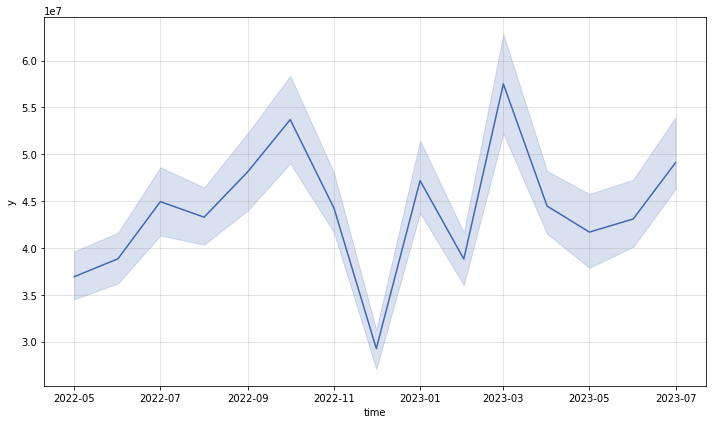

In [63]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  
    quadratic_model,
    sarima,
    theta,
)

model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()), 
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

m = KatsEnsemble(
    data=data_from_series, 
    params=KatsEnsembleParam
    )

m.fit()
fcst = m.predict(steps=15)
m.aggregate()

m.plot()

In [77]:
data = fcst.aggregate()

In [82]:
data["fcst"].values

array([36931390.88519301, 38853265.29617728, 44944668.46812397,
       43291526.1422966 , 48149217.94150831, 53702508.84538187,
       44258716.81279784, 29262337.97707148, 47190085.7228941 ,
       38816699.35331747, 57521197.84171356, 44475672.49125026,
       41695629.34866793, 43096497.88954668, 49105526.32539581])

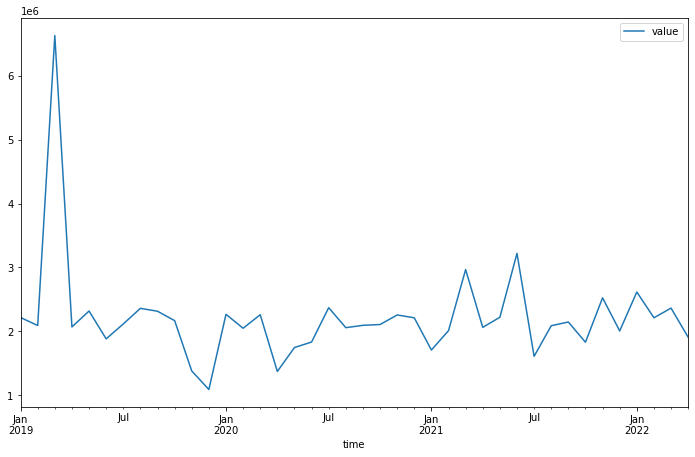

In [86]:

data_germany = data[data["Country"]=="Canada"]
data_germany =  data_germany.drop("Country" , axis=1)
data  = data_germany.copy()
data.columns = ["time", "value"]
data = TimeSeriesData(data)
data_from_series = TimeSeriesData(time=data.time, value=data.value)
data_from_series.plot(cols=['value'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


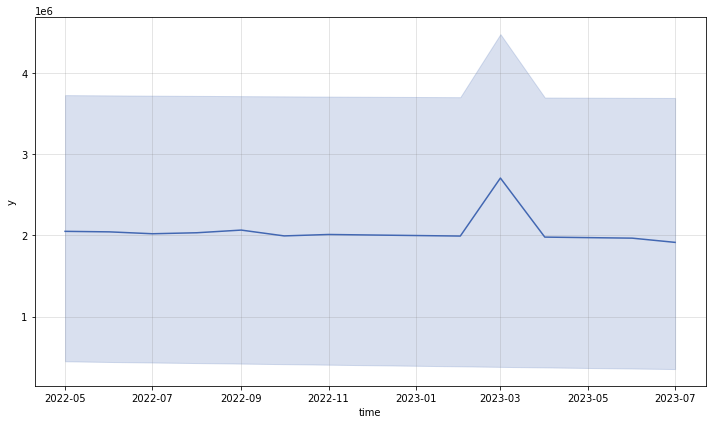

In [87]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  
    quadratic_model,
    sarima,
    theta,
)

model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()), 
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

m = KatsEnsemble(
    data=data_from_series, 
    params=KatsEnsembleParam
    )

m.fit()
fcst = m.predict(steps=15)
m.aggregate()

m.plot()

In [89]:
data = fcst.aggregate()

In [90]:
data["fcst"].values

array([2050173.03194406, 2043722.75813216, 2020511.24917005,
       2032768.87513551, 2065581.73949416, 1993968.92208139,
       2011471.3890727 , 2005021.11526081, 1998570.84144892,
       1992120.56763702, 2706094.3058008 , 1979220.02001324,
       1972769.74620135, 1966319.47238945, 1914343.897591  ])

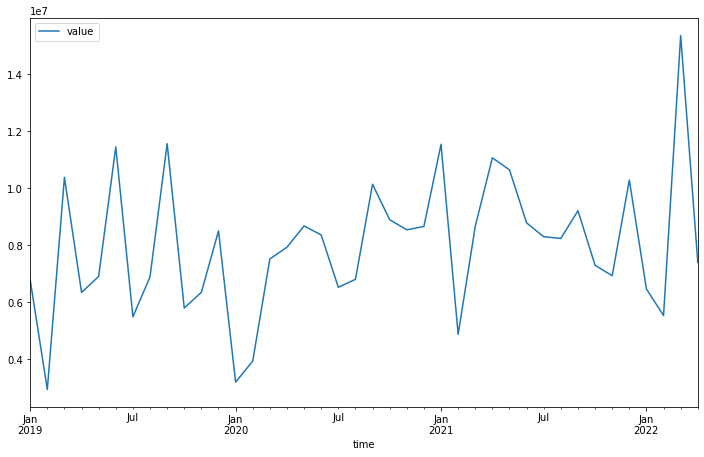

In [93]:
data_germany = data[data["Country"]=="China"]
data_germany =  data_germany.drop("Country" , axis=1)
data  = data_germany.copy()
data.columns = ["time", "value"]
data = TimeSeriesData(data)
data_from_series = TimeSeriesData(time=data.time, value=data.value)
data_from_series.plot(cols=['value'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


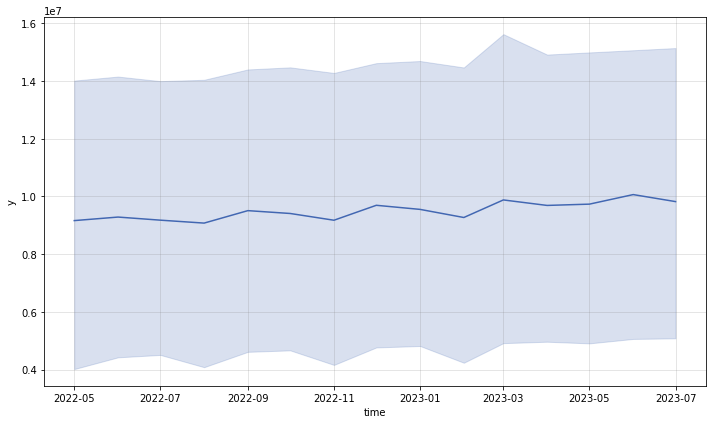

In [94]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  
    quadratic_model,
    sarima,
    theta,
)

model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()), 
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

m = KatsEnsemble(
    data=data_from_series, 
    params=KatsEnsembleParam
    )

m.fit()
fcst = m.predict(steps=15)
m.aggregate()

m.plot()

In [95]:
data = fcst.aggregate()

In [97]:
data["fcst"].values

array([ 9161986.22975833,  9284652.04842944,  9177243.88033804,
        9075645.69177295,  9507316.78683619,  9408667.21566997,
        9174817.99149958,  9692560.70194755,  9550567.8619609 ,
        9269409.33228417,  9878110.17586752,  9687887.54930979,
        9732642.78755008, 10063657.15475459,  9820626.27771664])

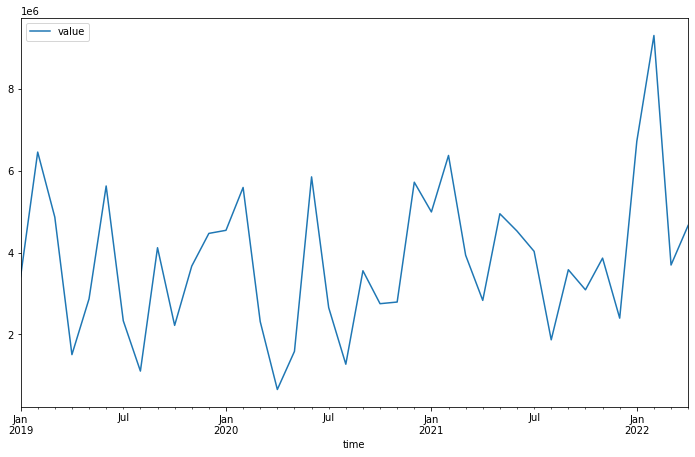

In [100]:
data_germany = data[data["Country"]=="Italy"]
data_germany =  data_germany.drop("Country" , axis=1)
data  = data_germany.copy()
data.columns = ["time", "value"]
data = TimeSeriesData(data)
data_from_series = TimeSeriesData(time=data.time, value=data.value)
data_from_series.plot(cols=['value'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


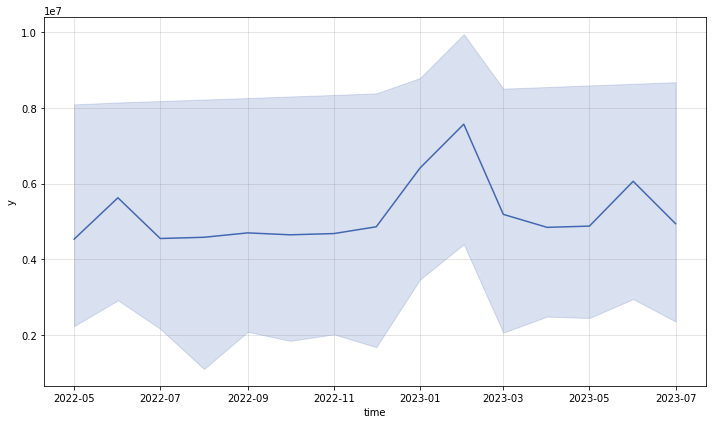

In [101]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  
    quadratic_model,
    sarima,
    theta,
)

model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()), 
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

m = KatsEnsemble(
    data=data_from_series, 
    params=KatsEnsembleParam
    )

m.fit()
fcst = m.predict(steps=15)
m.aggregate()

m.plot()

In [102]:
data = fcst.aggregate()
data["fcst"].values

array([4534006.45762704, 5626174.28744909, 4551009.65461204,
       4583264.00002067, 4699380.50402451, 4648666.2125536 ,
       4681415.82021354, 4860304.89426958, 6410899.33945041,
       7568479.83724299, 5188005.66033453, 4845176.61828069,
       4877928.89079445, 6060795.76030038, 4943433.43595896])

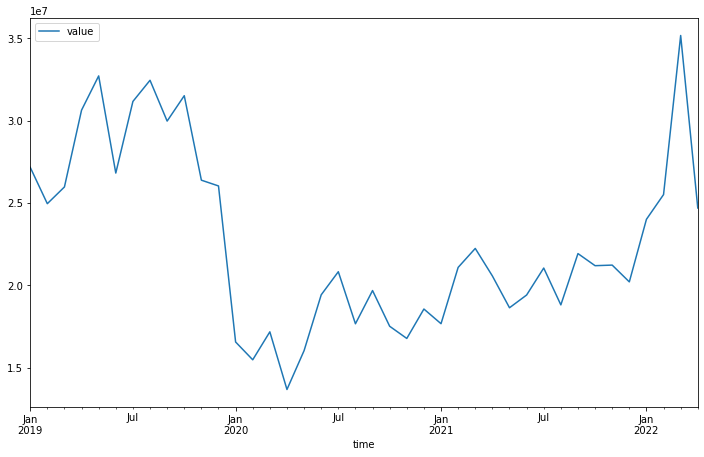

In [104]:
data_germany = data[data["Country"]=="USA"]
data_germany =  data_germany.drop("Country" , axis=1)
data  = data_germany.copy()
data.columns = ["time", "value"]
data = TimeSeriesData(data)
data_from_series = TimeSeriesData(time=data.time, value=data.value)
data_from_series.plot(cols=['value'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


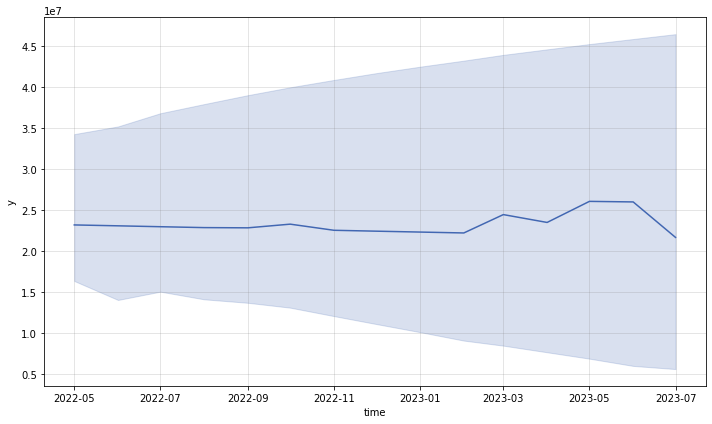

In [105]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  
    quadratic_model,
    sarima,
    theta,
)

model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()), 
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

m = KatsEnsemble(
    data=data_from_series, 
    params=KatsEnsembleParam
    )

m.fit()
fcst = m.predict(steps=15)
m.aggregate()

m.plot()

In [106]:
data = fcst.aggregate()
data["fcst"].values

array([23227274.35509963, 23118468.71673843, 23009663.07837721,
       22900857.440016  , 22873562.41157926, 23321739.46985802,
       22574440.52493238, 22465634.88657117, 22356829.24820995,
       22248023.60984875, 24487105.82982071, 23530458.50528705,
       26100327.12161954, 26032357.39052919, 21703995.41804269])